# Climate change prediction
### By Zain Amir Zaman

Dataset: https://gee-community-catalog.org/projects/br_dwgd/

In [16]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import xarray as xr
from pathlib import Path
import seaborn as sb

xr.set_options(keep_attrs=True, display_expand_data=False)
np.set_printoptions(threshold=10, edgeitems=2)

%xmode minimal
%matplotlib inline
%config InlineBackend.figure_format='retina'

Exception reporting mode: Minimal


In [17]:
def create_circular_mask(h, w, center=None, radius=None):
    if center is None: # use the middle of the image
        center = (int(w/2), int(h/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])
    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

In [18]:
# Replace with path of BR-DWGD dataset
path = Path(r"C:\Users\Zaman\Documents\Makeathon\BR-DWGD\data")
tmax = xr.open_mfdataset(path / 'Tmax_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.2.2.nc').Tmax
tmin = xr.open_mfdataset(path / 'Tmin_20010101_20200731_BR-DWGD_UFES_UTEXAS_v_3.2.2.nc').Tmin

In [19]:
day_first, day_last = '2014-01-01T00:00:00.000000000', '2018-12-31T00:00:00.000000000'
tmax_slice = tmax.sel(time=slice(day_first, day_last))
tmin_slice = tmin.sel(time=slice(day_first, day_last))
tmax_data = tmax_slice.data.compute()
tmin_data = tmin_slice.data.compute()

In [20]:
mask = create_circular_mask(tmax_data.shape[1], tmax_data.shape[2], center=(150, 100), radius=160)

### Get mean data

In [21]:
tmax_mean = []
tmin_mean = []
t_mean = []

for i in range(tmax_data.shape[0]):
    dt = tmax_slice["time"].data[i]
    flipped_data = np.flip(tmax_data[i], axis=0)
    masked_data = flipped_data * mask
    tmax_mean.append(np.nanmean(masked_data))
    flipped_data = np.flip(tmin_data[i], axis=0)
    masked_data = flipped_data * mask
    tmin_mean.append(np.nanmean(masked_data))
    t_mean.append(np.mean(np.array([tmax_mean, tmin_mean])))
    # fig, ax = plt.subplots(1)
    # ax.imshow(masked_data)
    # ax.set_title(dt)
    # ax.set_xlabel("Longitude")
    # ax.set_ylabel("Latitude")

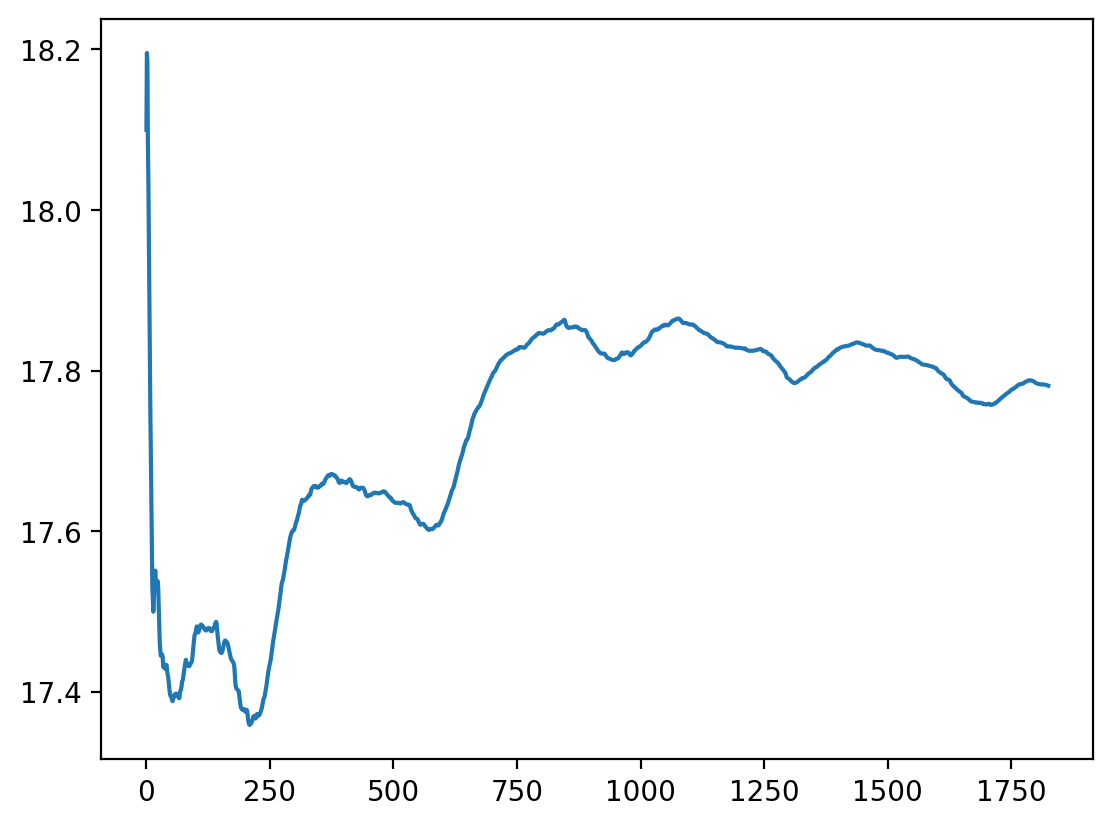

In [22]:
plt.plot(np.arange(0, len(t_mean)), t_mean)

### Pipeline

c:\Users\Zaman\Documents\Makeathon\BR-DWGD\.venv\Lib\site-packages\seaborn\regression.py:411: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, **kws)


Text(0, 0.5, 'Temperature change')

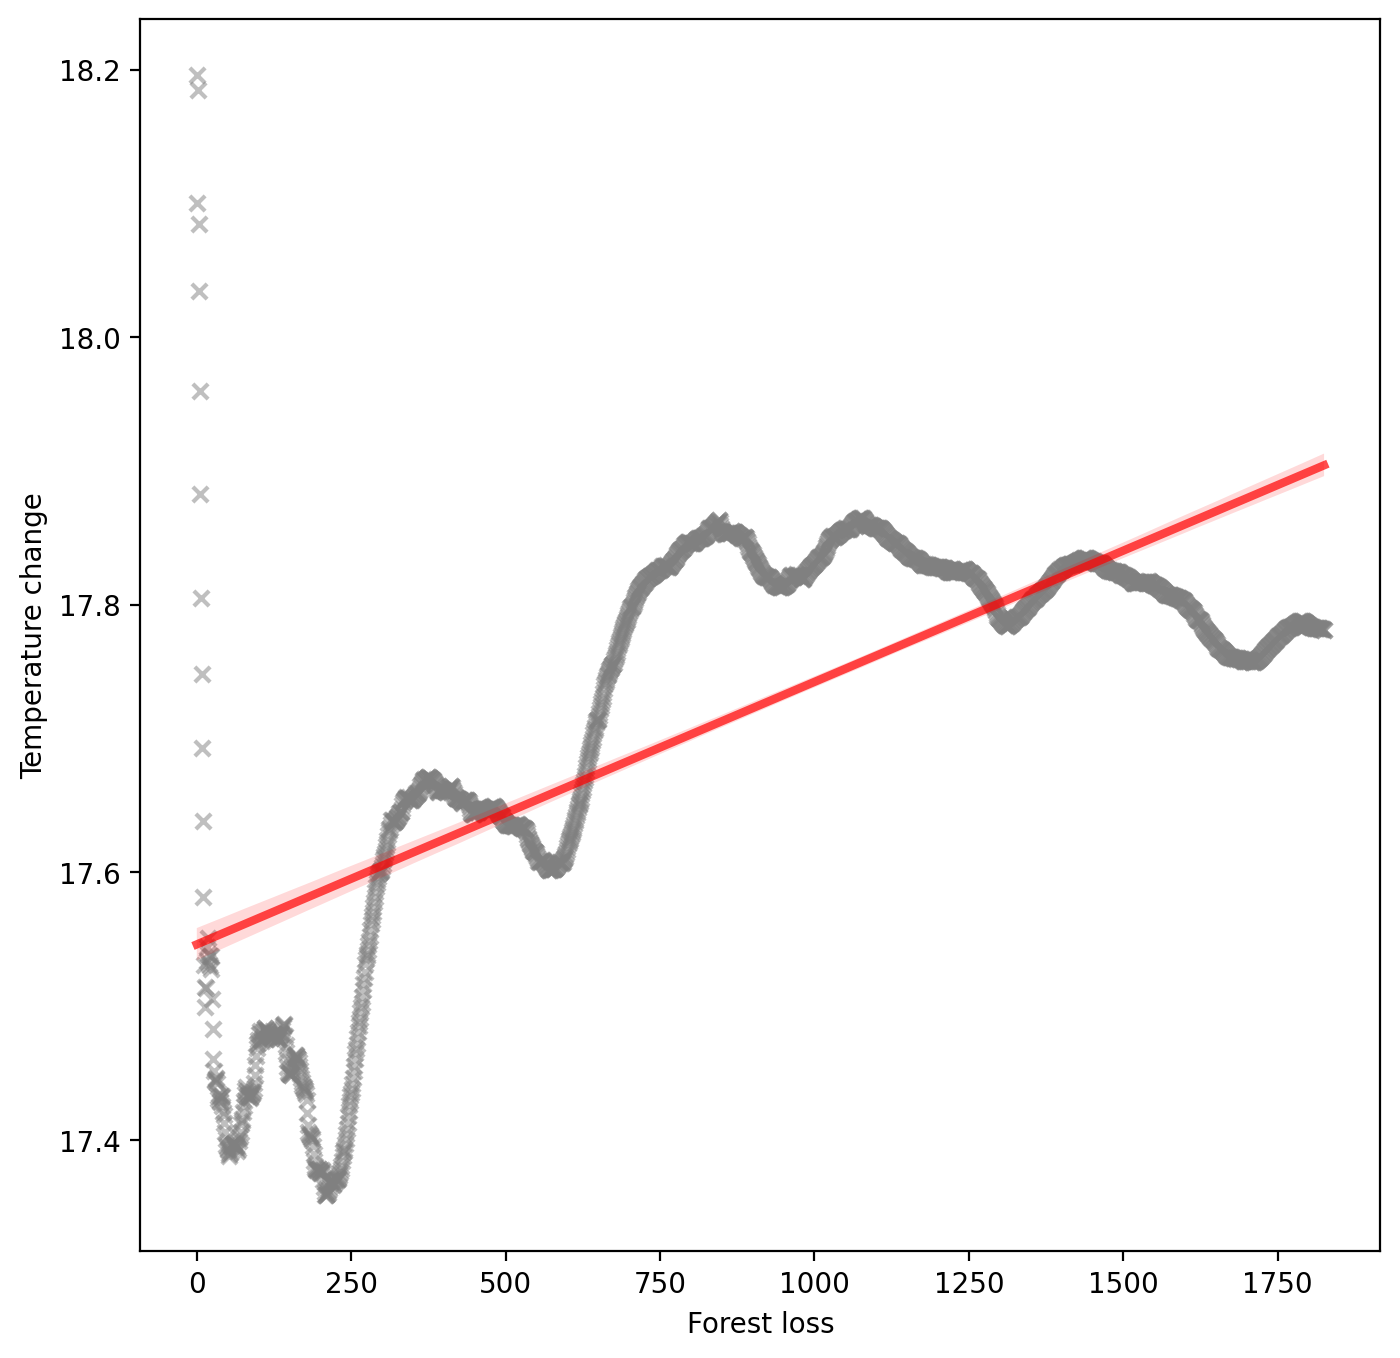

In [24]:
forest_loss = np.arange(len(t_mean)) + np.random.normal(0, 0.1, len(t_mean)) # Replace with forest loss input features
plt.figure(figsize=(8,8))

sb.regplot(x=forest_loss, y=t_mean, marker="x", scatter_kws=dict(alpha=0.5, s=30, color='gray', edgecolors='white'),
                 line_kws=dict(alpha=0.7, color='red', linewidth=3))
plt.xlabel("Forest loss")
plt.ylabel("Temperature change")